# Stock prediction of Apple.inc using artificial recurrent neural network called Long Short Term Memory (LSTM)
## [Video Tutorial for given code](https://www.youtube.com/watch?v=QIUxPv5PJOY&ab_channel=ComputerScienceComputerScience)
## [Concept of LSTM](https://www.youtube.com/watch?v=WCUNPb-5EYI&ab_channel=BrandonRohrer)
## [Course on Neural Networks](https://www.youtube.com/playlist?list=PLVZqlMpoM6kaJX_2lLKjEhWI0NlqHfqzp)
## [Another Good Tutorial](https://www.youtube.com/watch?v=arydWPLDnEc)

In [1]:
%config Completer.use_jedi = False

In [2]:
import math
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, model_from_json, load_model
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
import mplfinance as mpf
plt.style.use('fivethirtyeight')

In [15]:
df = yf.download("JEPI")
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,60.720001,60.720001,60.490002,60.570000,60.174999,457600
2021-06-29,60.740002,60.740002,60.560001,60.580002,60.184937,451400
2021-06-30,60.660000,60.660000,60.500000,60.570000,60.174999,480100
2021-07-01,60.349998,60.490002,60.220001,60.450001,60.450001,383400
2021-07-02,60.560001,60.630001,60.430000,60.599998,60.599998,292800


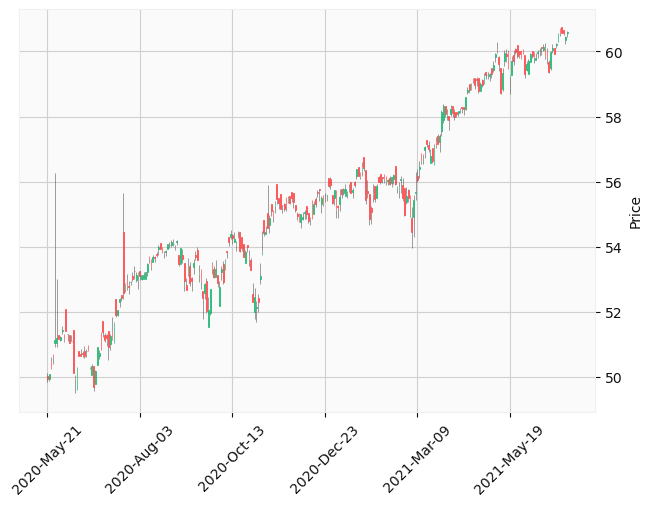

In [4]:
mpf.plot(df, style="yahoo", type="candle")

Text(0, 0.5, 'Close Price USD ($)')

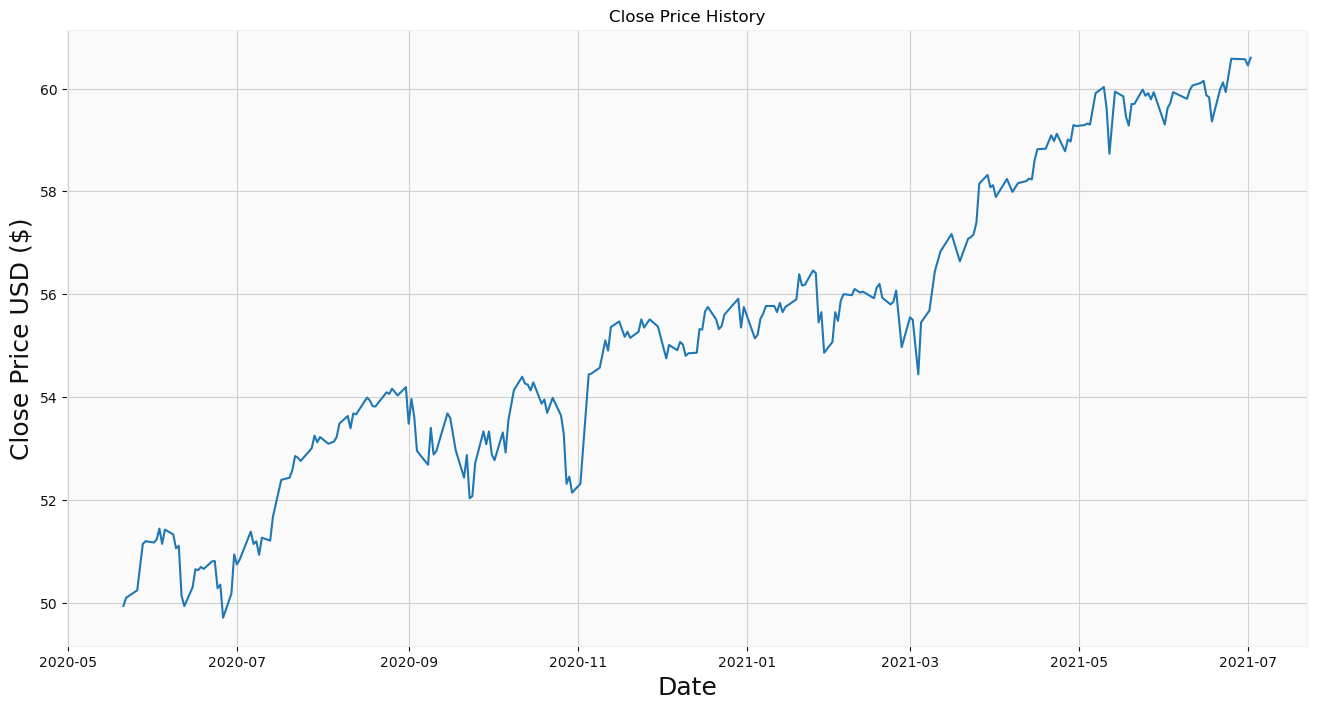

In [5]:
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(len(dataset)*0.8)
dataset

array([[49.93500137],
       [50.09400177],
       [50.23799896],
       [50.6269989 ],
       [51.13999939],
       [51.19400024],
       [51.16799927],
       [51.22700119],
       [51.43899918],
       [51.14199829],
       [51.41899872],
       [51.32699966],
       [51.05599976],
       [51.10499954],
       [50.13299942],
       [49.93000031],
       [50.29999924],
       [50.64799881],
       [50.63100052],
       [50.69200134],
       [50.65499878],
       [50.80099869],
       [50.80799866],
       [50.27899933],
       [50.34799957],
       [49.70500183],
       [50.17399979],
       [50.93600082],
       [50.74000168],
       [50.8370018 ],
       [51.38000107],
       [51.13999939],
       [51.19200134],
       [50.92900085],
       [51.26200104],
       [51.20500183],
       [51.67300034],
       [51.89899826],
       [52.04999924],
       [52.38600159],
       [52.43000031],
       [52.57699966],
       [52.84999847],
       [52.81800079],
       [52.75500107],
       [52

In [7]:
# Scaling the Data
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.02111057],
       [0.03570446],
       [0.04892128],
       [0.08462573],
       [0.13171161],
       [0.13666809],
       [0.13428159],
       [0.13969709],
       [0.15915538],
       [0.13189508],
       [0.15731963],
       [0.14887548],
       [0.12400168],
       [0.12849914],
       [0.03928387],
       [0.02065154],
       [0.05461199],
       [0.08655321],
       [0.08499302],
       [0.090592  ],
       [0.08719571],
       [0.10059635],
       [0.10123884],
       [0.0526845 ],
       [0.05901771],
       [0.        ],
       [0.04304709],
       [0.11298755],
       [0.09499772],
       [0.1039009 ],
       [0.15374023],
       [0.13171161],
       [0.13648462],
       [0.11234506],
       [0.14290956],
       [0.13767788],
       [0.18063324],
       [0.20137651],
       [0.21523618],
       [0.24607624],
       [0.25011467],
       [0.26360704],
       [0.28866431],
       [0.28572739],
       [0.27994495],
       [0.29508925],
       [0.3026157 ],
       [0.325

In [8]:
# Create the training dataset
# Creating the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0]) 

In [9]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(165, 60, 1)

In [11]:
# Building the LTSM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [13]:
# Train the model
if os.path.exists('./prediction.json'):
    # load json and create model
    json_file = open('./prediction.json', 'r')

    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    # load weights into new model
    model.load_weights("./prediction.h5")

    model.save('./prediction.hdf5')
    model = load_model('./prediction.hdf5')
else:
    model.fit(x_train, y_train, epochs=1, batch_size=1)
    with open("./prediction.json", "w") as json_file:
        json_file.write(model.to_json())
    model.save_weights("./prediction.h5")

In [16]:
# create testing dataset
# Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
print(test_data)
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
print(x_test, y_test)


       0.77512642, 0.79072974, 0.76870148, 0.77237262, 0.75126205,
       0.7833871 , 0.77237262, 0.76044079, 0.76778343, 0.77604411,
       0.77971561, 0.7843048 , 0.78246905, 0.81734755, 0.83662237,
       0.83754041, 0.85222604, 0.86140443, 0.85130799, 0.86415787,
       0.83295087, 0.85406144, 0.85039029, 0.87976155, 0.8779258 ,
       0.87976155, 0.88251499, 0.88067924, 0.9054613 , 0.9366683 ,
       0.94768244, 0.9091328 , 0.82836168, 0.88435074, 0.93942175,
       0.93116106, 0.89444717, 0.8788435 , 0.91739348, 0.91739348,
       0.94309324, 0.93207911, 0.9366683 , 0.92565417, 0.93850405]), array([0.54841673, 0.58329523, 0.61909142, 0.63744854, 0.65396991,
       0.67599818, 0.68517656, 0.66957324, 0.64938037, 0.63653049,
       0.67691623, 0.67966967, 0.68517656, 0.70628748, 0.77512642,
       0.79072974, 0.76870148, 0.77237262, 0.75126205, 0.7833871 ,
       0.77237262, 0.76044079, 0.76778343, 0.77604411, 0.77971561,
       0.7843048 , 0.78246905, 0.81734755, 0.83662237, 0.83

In [17]:
# Convert to numpy array
x_test = np.array(x_test)

In [18]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [20]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.014855301171018366

                Close  Predictions
Date                              
2021-04-14  58.230000    58.291901
2021-04-15  58.610001    58.272522
2021-04-16  58.820000    58.670567
2021-04-19  58.830002    58.846188
2021-04-20  58.990002    58.843330
2021-04-21  59.090000    59.008419
2021-04-22  58.980000    59.087452
2021-04-23  59.119999    58.966331
2021-04-26  58.779999    59.138130
2021-04-27  59.009998    58.758038
2021-04-28  58.970001    59.075321
2021-04-29  59.290001    58.987675
2021-04-30  59.270000    59.365177
2021-05-03  59.290001    59.285114
2021-05-04  59.320000    59.333057
2021-05-05  59.299999    59.353069
2021-05-06  59.570000    59.334339
2021-05-07  59.910000    59.634953
2021-05-10  60.029999    59.955330
2021-05-11  59.610001    60.034340
2021-05-12  58.730000    59.561752
2021-05-13  59.340000    58.709038
2021-05-14  59.939999    59.514809
2021-05-17  59.849998    60.035919
2021-05-18  59.450001    59.880333
2021-05-19  59.279999    59.477497
2021-05-20  59.70000

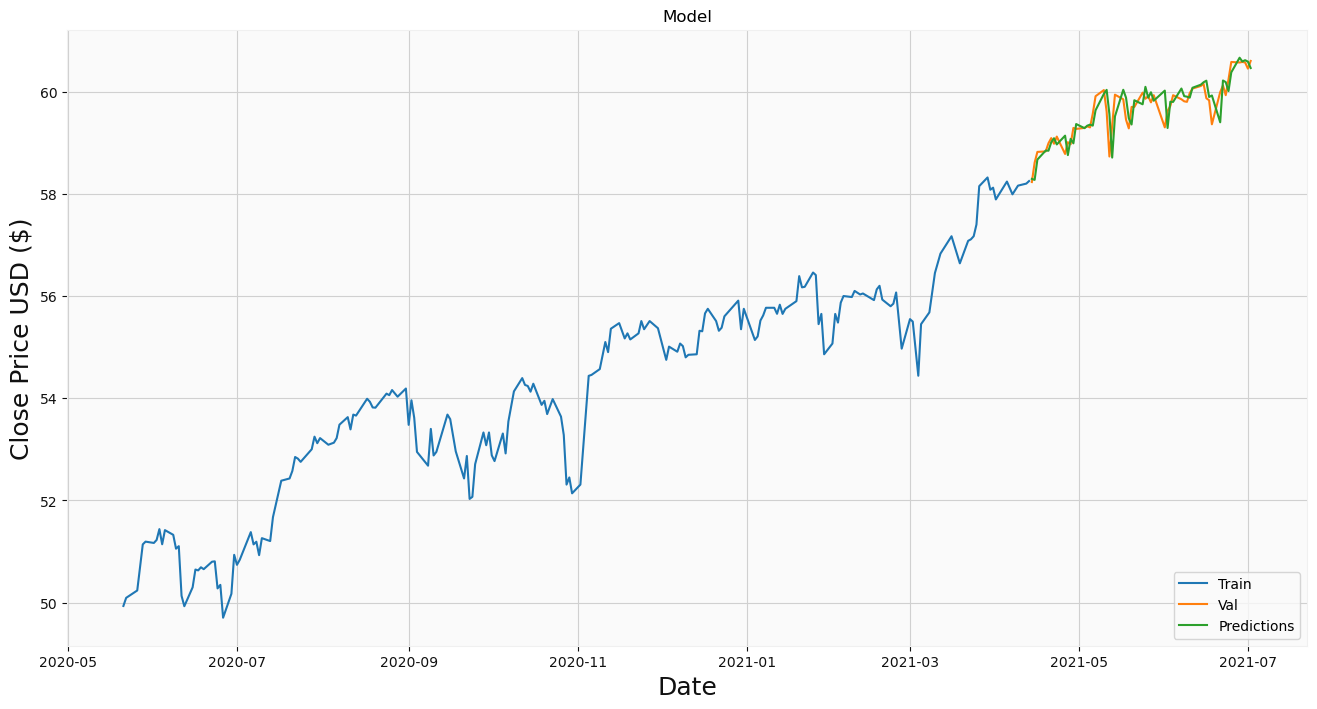

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
print(valid)
# Visualize the model
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [22]:
# Show the valid and predicted prices
print(predictions, x_test)

[[58.2919  ]
 [58.272522]
 [58.670567]
 [58.846188]
 [58.84333 ]
 [59.00842 ]
 [59.087452]
 [58.96633 ]
 [59.13813 ]
 [58.758038]
 [59.07532 ]
 [58.987675]
 [59.365177]
 [59.285114]
 [59.333057]
 [59.35307 ]
 [59.33434 ]
 [59.634953]
 [59.95533 ]
 [60.03434 ]
 [59.561752]
 [58.709038]
 [59.51481 ]
 [60.03592 ]
 [59.880333]
 [59.477497]
 [59.35631 ]
 [59.83105 ]
 [59.751713]
 [60.093727]
 [59.88099 ]
 [59.986996]
 [59.821815]
 [60.019547]
 [59.287937]
 [59.801502]
 [59.798744]
 [60.060272]
 [59.91135 ]
 [59.90069 ]
 [59.88165 ]
 [60.07526 ]
 [60.134956]
 [60.182575]
 [60.213856]
 [59.895203]
 [59.9244  ]
 [59.399323]
 [60.217255]
 [60.18625 ]
 [60.01001 ]
 [60.376724]
 [60.663113]
 [60.589466]
 [60.614994]
 [60.586826]
 [60.46166 ]] [[[0.55484167]
  [0.5686096 ]
  [0.61358418]
  ...
  [0.77604411]
  [0.77971561]
  [0.7843048 ]]

 [[0.5686096 ]
  [0.61358418]
  [0.59339131]
  ...
  [0.77971561]
  [0.7843048 ]
  [0.78246905]]

 [[0.61358418]
  [0.59339131]
  [0.59430936]
  ...
  [0.784304